#Άσκηση 2, Μετασχηματισμός Fourier:

Θεωρήστε την εικόνα αποχρώσεων του γκρι (grayscale image) ‘cornfield.jpg’.

**Ζητούμενα:**

Α. Υπολογίστε τον 2Δ μετασχηματισμό Fourier (DFT) της εικόνας και τυπώστε τα
φάσματα πλάτους και φάσης.

Β. Αντικαταστήστε το φάσμα φάσης με το κατακόρυφα συμμετρικό του (δηλαδή
συμμετρικό ως προς τον οριζόντιο άξονα) και τυπώστε εκ νέου τα φάσματα πλάτους
και φάσης του τροποποιημένου μετασχηματισμού Fourier.

Γ. Υπολογίστε τον αντίστροφο μετασχηματισμό Fourier και τυπώστε την τροποποιημένη εικόνα. Σχολιάστε το αποτέλεσμα.

In [1]:
%pip install matplotlib numpy scikit-image --quiet

Note: you may need to restart the kernel to use updated packages.


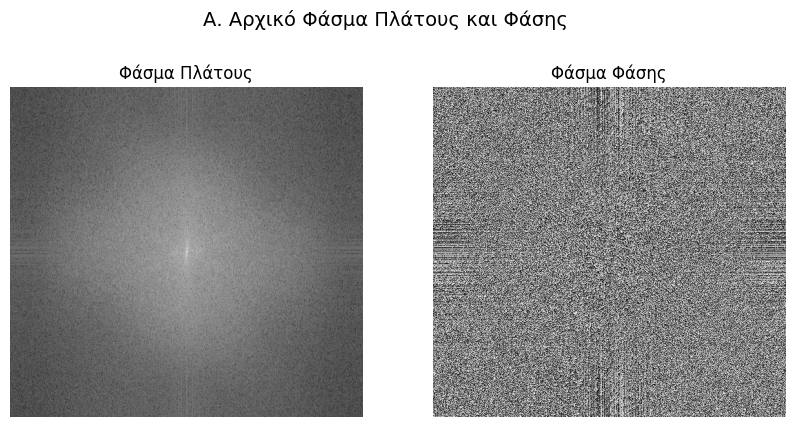

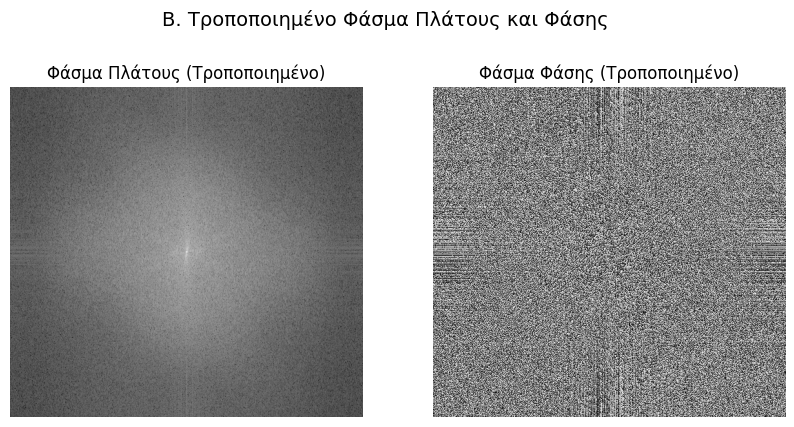

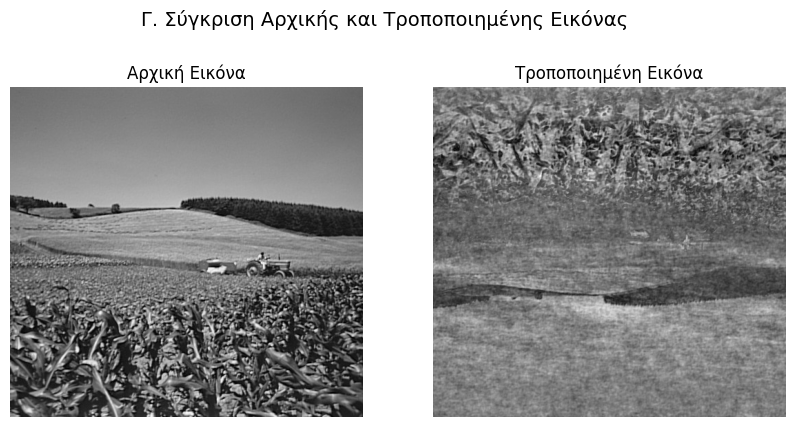

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import skimage as ski

# Φόρτωση της εικόνας
image = ski.io.imread("https://github.com/KaratziasK/DIP-Images/blob/main/images-project-1/cornfield.jpg?raw=true")

# Υπολογισμός του 2Δ μετασχηματισμού Fourier
dft = np.fft.fft2(image)
dft_shift = np.fft.fftshift(dft)

# Υπολογισμός του φάσματος πλάτους και φάσης
width_spectrum = np.abs(dft_shift)
phase_spectrum = np.angle(dft_shift)

fig1, axs1 = plt.subplots(1, 2, figsize=(10, 5))
fig1.suptitle("Α. Αρχικό Φάσμα Πλάτους και Φάσης", fontsize=14)

# Φάσμα Πλάτους
axs1[0].imshow(np.log(width_spectrum + 1), cmap='gray')
axs1[0].set_title('Φάσμα Πλάτους')
axs1[0].axis('off')

# Φάσμα Φάσης
axs1[1].imshow(phase_spectrum, cmap='gray')
axs1[1].set_title('Φάσμα Φάσης')
axs1[1].axis('off')

# Β. Τροποποίηση του φάσματος φάσης (κατακόρυφο συμμετρικό)
modified_phase_spectrum = np.flipud(phase_spectrum)

fig2, axs2 = plt.subplots(1, 2, figsize=(10, 5))
fig2.suptitle("Β. Τροποποιημένο Φάσμα Πλάτους και Φάσης", fontsize=14)

# Φάσμα Πλάτους
axs2[0].imshow(np.log(width_spectrum + 1), cmap='gray')
axs2[0].set_title('Φάσμα Πλάτους (Τροποποιημένο)')
axs2[0].axis('off')

# Φάσμα Φάσης
axs2[1].imshow(modified_phase_spectrum, cmap='gray')
axs2[1].set_title('Φάσμα Φάσης (Τροποποιημένο)')
axs2[1].axis('off')

# Δημιουργία του τροποποιημένου μετασχηματισμού Fourier
modified_fshift = width_spectrum * np.exp(1j * modified_phase_spectrum)

# Αντίστροφος μετασχηματισμός Fourier
modified_f = np.fft.ifftshift(modified_fshift)  # Αντιστροφή της μετατόπισης του φάσματος
modified_image = np.fft.ifft2(modified_f)

# Εμφάνιση της τροποποιημένης εικόνας
fig3, axs3 = plt.subplots(1, 2, figsize=(10, 5))
fig3.suptitle("Γ. Σύγκριση Αρχικής και Τροποποιημένης Εικόνας", fontsize=14)

# Αρχική εικόνα
axs3[0].imshow(image, cmap='gray')
axs3[0].set_title('Αρχική Εικόνα')
axs3[0].axis('off')

# Τροποποιημένη εικόνα
axs3[1].imshow(np.abs(modified_image), cmap='gray')
axs3[1].set_title('Τροποποιημένη Εικόνα')
axs3[1].axis('off')


plt.show()


---
# Σχόλια Αποτελέσματος:

Η τροποποιημένη εικόνα που προκύπτει μετά την αντικατάσταση της φάσης με το κατακόρυφα συμμετρικό της παρουσιάζει σημαντικές αλλαγές συγκριτικά με την αρχική. Αν και τα γενικά μοτίβα φωτεινότητας παραμένουν ίδια, η δομή και τα περιγράμματα των αντικειμένων εμφανίζονται παραμορφωμένα και ανεστραμμένα. Η φάση μεταφέρει το μεγαλύτερο μέρος της δομικής πληροφορίας της εικόνας ενώ το πλάτος σχετίζεται κυρίως με τις εντάσεις της φωτεινότητας.